### From jmportilla/Udemy---Machine-Learning/NLP (Natural Language Processing).ipynb

https://github.com/jmportilla/Udemy---Machine-Learning/blob/master/NLP%20(Natural%20Language%20Processing).ipynb

<br><br>

N.b. another useful reference is:

machine-learning-projects/Natural-Language-Processing/Restuarant_Reviews/Restuarant_Review_Classifier.py

https://github.com/sayands/machine-learning-projects/blob/master/Natural-Language-Processing/Restuarant_Reviews/Restuarant_Review_Classifier.py


In [52]:
# Imports

import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
# Load response data

responses_df = pd.read_csv('output/relative-performance.csv', index_col=0)

responses_df.shape
responses_df.head()

,Company,Symbol Yahoo,Period Start Date,Period End Date,return_ratio,max_index_return_ratio,relative_performance_pp
0,ABCAM,ABC.L,2016-09-23,2017-08-25,1.29,1.23,0.06
1,ADVANCED MEDICAL SOLUTIONS,AMS.L,2017-03-28,2018-02-28,1.31,1.13,0.18
2,ALLIANCE PHARMA,APH.L,2017-12-04,2018-03-15,1.12,1.03,0.09
3,ASOS,ASC.L,2016-11-11,2017-10-13,1.23,1.29,-0.06
4,BLUE PRISM,PRSM.L,2017-06-30,2018-08-10,2.55,1.07,1.48


count    54.000000
mean      0.197963
std       0.549897
min      -0.420000
25%      -0.115000
50%       0.050000
75%       0.372500
max       2.650000
Name: relative_performance_pp, dtype: float64

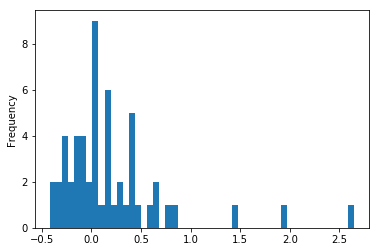

In [3]:
# Set response field for modelling
responses_df['relative_performance_pp'].plot(bins=50, kind='hist')

responses_df['relative_performance_pp'].describe()

In [4]:
responses_df['response'] = np.where(responses_df['relative_performance_pp']>=0.05, 1,0)

responses_df.head()

responses_df['response'].value_counts()

1    27
0    27
Name: response, dtype: int64

In [5]:
# Load input data
with open('data/ar_text_cleaned.pkl', 'rb') as f:
    ar_text_cleaned = pickle.load(f)

In [27]:
# Create modelling dataset

modelling_dataset = pd.DataFrame(ar_text_cleaned, columns=['input'])
modelling_dataset['response'] = responses_df['response']
modelling_dataset['response_raw'] = responses_df['relative_performance_pp']
modelling_dataset.insert(0, 'name', responses_df['Company'])

modelling_dataset.shape
modelling_dataset.head()

,name,input,response,response_raw
0,ABCAM,aspire influential life science company resear...,1,0.06
1,ADVANCED MEDICAL SOLUTIONS,annual report creating quality outcome advance...,1,0.18
2,ALLIANCE PHARMA,alliance pharma plc avonbridge house bath road...,1,0.09
3,ASOS,annual report account asos global fashion dest...,0,-0.06
4,BLUE PRISM,blue prism slide deck commercial confidencecom...,1,1.48


In [8]:
bow_transformer = CountVectorizer().fit(modelling_dataset['input'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

19019


In [10]:
# Check BOW output for first AR

print(modelling_dataset['input'][0][0:300])

test_doc = modelling_dataset['input'][0]

bow_test = bow_transformer.transform([test_doc])

print(type(bow_test))
print(bow_test.shape)
print(bow_test)

aspire influential life science company researcher worldwide abcam plc annual report account b ca p lc n n u l r e p rt n c c u n t icc image antibody ab staining actin hela cell delivering strong revenue performance whilst investing next chapter abcam growth committed serving life science researche
<class 'scipy.sparse.csr.csr_matrix'>
(1, 19019)
  (0, 3)	1
  (0, 9)	3
  (0, 11)	1
  (0, 25)	1
  (0, 26)	294
  (0, 27)	7
  (0, 43)	7
  (0, 47)	12
  (0, 57)	12
  (0, 64)	2
  (0, 67)	4
  (0, 73)	3
  (0, 76)	1
  (0, 77)	1
  (0, 85)	4
  (0, 87)	1
  (0, 90)	3
  (0, 91)	1
  (0, 97)	1
  (0, 98)	3
  (0, 104)	2
  (0, 106)	1
  (0, 108)	1
  (0, 111)	8
  (0, 114)	3
  :	:
  (0, 18716)	1
  (0, 18717)	28
  (0, 18718)	1
  (0, 18721)	3
  (0, 18724)	3
  (0, 18725)	13
  (0, 18728)	1
  (0, 18734)	2
  (0, 18735)	10
  (0, 18745)	1
  (0, 18751)	46
  (0, 18770)	2
  (0, 18772)	1
  (0, 18773)	6
  (0, 18775)	1
  (0, 18784)	8
  (0, 18926)	552
  (0, 18932)	8
  (0, 18935)	5
  (0, 18939)	10
  (0, 18952)	1
  (0, 18955)	1


In [11]:
print(26,   "\t"   , bow_transformer.get_feature_names()[26])
print(18926,"\t", bow_transformer.get_feature_names()[18926])
print(3,    "\t"    , bow_transformer.get_feature_names()[3])
print(18772,"\t", bow_transformer.get_feature_names()[18772])
print(18986,"\t", bow_transformer.get_feature_names()[18986])

26 	 abcam
18926 	 year
3 	 aaai
18772 	 writing
18986 	 zero


In [12]:
# BOW all docs

bow_all = bow_transformer.transform(modelling_dataset['input'])

print('Shape of Sparse Matrix: ', bow_all.shape)
print('Amount of Non-Zero occurences: ', bow_all.nnz)
print('sparsity: %.2f%%' % (100.0 * bow_all.nnz / (bow_all.shape[0] * bow_all.shape[1])))

Shape of Sparse Matrix:  (54, 19019)
Amount of Non-Zero occurences:  139991
sparsity: 13.63%


In [13]:
# TF-IDF

tfidf_transformer = TfidfTransformer().fit(bow_all)

# Look at output for one doc
tfidf_test = tfidf_transformer.transform(bow_test)
print(tfidf_test)

  (0, 18986)	0.000818791875027
  (0, 18981)	0.00123828826507
  (0, 18969)	0.00197512142378
  (0, 18955)	0.00155562503374
  (0, 18952)	0.000691686462723
  (0, 18939)	0.00529782914977
  (0, 18935)	0.00237389212105
  (0, 18932)	0.0102921954846
  (0, 18926)	0.252716740713
  (0, 18784)	0.00393911251133
  (0, 18775)	0.00147215454534
  (0, 18773)	0.0029543343835
  (0, 18772)	0.000735321386631
  (0, 18770)	0.00105956582995
  (0, 18751)	0.0214461562693
  (0, 18745)	0.000944434601797
  (0, 18735)	0.00691686462723
  (0, 18734)	0.00102140862702
  (0, 18728)	0.00102311111778
  (0, 18725)	0.00606087025002
  (0, 18724)	0.00191792128462
  (0, 18721)	0.00161888666933
  (0, 18718)	0.00197512142378
  (0, 18717)	0.0128189651086
  (0, 18716)	0.00178949131401
  :	:
  (0, 114)	0.0031579744659
  (0, 111)	0.00408563450806
  (0, 108)	0.000592309951332
  (0, 106)	0.000651850898235
  (0, 104)	0.000932441576926
  (0, 98)	0.0019555526947
  (0, 97)	0.0010526581553
  (0, 91)	0.00108424448431
  (0, 90)	0.0040213436593

In [14]:
# Check TF_IDF results for some example words

print(tfidf_transformer.idf_[bow_transformer.vocabulary_['abcam']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['year']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['writing']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['zero']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['growth']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['director']])


3.90872089656
1.0
1.60613580357
1.78845736036
1.0
1.0


In [15]:
# TF-IDF on all the docs

tfidf_all = tfidf_transformer.transform(bow_all)
print(tfidf_all.shape)


(54, 19019)


In [118]:
# Naive Bayes model

model_naive_bayes = MultinomialNB().fit(tfidf_all, responses_df['response'])

In [119]:
# Check on one doc

print('predicted:', model_naive_bayes.predict(tfidf_test)[0])
print('predicted:', model_naive_bayes.predict_proba(tfidf_test)[0])
print('expected:', responses_df.response[0])

predicted: 1
predicted: [ 0.3847515  0.6152485]
expected: 1


In [120]:
# Run predictions for all obs

predictions_all  = model_naive_bayes.predict(tfidf_all)
print(predictions_all)

print(classification_report(responses_df['response'], predictions_all))

[1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       1.00      1.00      1.00        27

avg / total       1.00      1.00      1.00        54



In [113]:
# Split into training and validation datasets

input_train, input_test, label_train, label_test, names_train, names_test, resp_raw_train, resp_raw_test = train_test_split(\
                modelling_dataset['input'], \
                modelling_dataset['response'], \
                modelling_dataset['name'], \
                modelling_dataset['response_raw'], \
                test_size=0.2)

print("Training set: ", len(input_train), len(input_test), len(input_train)+len(input_test))
print("Test set: ", len(label_train), len(label_test), len(label_train)+len(label_test))
# print("Names set train: ", names_train)
print("Names set test: ", names_test)
print("Raw responses set: ", len(resp_raw_train), len(resp_raw_test), len(resp_raw_train)+len(resp_raw_test))
                  

Training set:  43 11 54
Test set:  43 11 54
Names set test:  17       FIRST DERIV.
34     MULBERRY GROUP
46     SMART METERING
51       WATKIN JONES
40       PURPLEBRICKS
20           GB GROUP
41              REDDE
47       SOUND ENERGY
42     RENEW HOLDINGS
21    GOOCH & HOUSEGO
33        MIDWICH GRP
Name: name, dtype: object
Raw responses set:  43 11 54


In [114]:
# Set up pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [115]:
# Call the pipeline on te training dataset

pipeline.fit(input_train,label_train)

predictions = pipeline.predict(input_test)

predicted_prob = pipeline.predict_proba(input_test)


print(classification_report(predictions,label_test))

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.36      0.53        11

avg / total       1.00      0.36      0.53        11



/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [117]:
predictions_df = pd.DataFrame(predictions, columns=['prediction'])
predictions_df['prob'] = predicted_prob[:,1]
predictions_df = predictions_df.join(names_test.to_frame().reset_index().drop('index', axis=1))
predictions_df = predictions_df.join(resp_raw_test.to_frame().reset_index().drop('index', axis=1))

predictions_df.shape
predictions_df.sort_values(by='prob', ascending=False)

(11, 4)

,prediction,prob,name,response_raw
9,1,0.693235,GOOCH & HOUSEGO,0.18
5,1,0.687975,GB GROUP,-0.10
0,1,0.685372,FIRST DERIV.,0.01
4,1,0.670294,PURPLEBRICKS,1.96
10,1,0.664272,MIDWICH GRP,0.66
6,1,0.658664,REDDE,-0.40
2,1,0.641577,SMART METERING,0.39
3,1,0.635049,WATKIN JONES,-0.02
8,1,0.620363,RENEW HOLDINGS,-0.24
1,1,0.609188,MULBERRY GROUP,-0.28


### machine-learning-projects/Natural-Language-Processing/Restuarant_Reviews/Restuarant_Review_Classifier.py

https://github.com/sayands/machine-learning-projects/blob/master/Natural-Language-Processing/Restuarant_Reviews/Restuarant_Review_Classifier.py

In [ ]:
# Creating the Bag Of Words Model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values

#Splitting the dataset into the Training Set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

#Fitting Classifier To The Training Set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy' ,random_state = 0)
classifier.fit(X_train,Y_train)

#Predicting The Test Set Results
y_pred = classifier.predict(X_test)

#Making The Confusion Matrix and Classification Report
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cr = classification_report(Y_test, y_pred)

## Scrap code

In [104]:
predicted_prob

predicted_prob[:,1]

array([[ 0.46516361,  0.53483639],
       [ 0.39584538,  0.60415462],
       [ 0.45783098,  0.54216902],
       [ 0.44194629,  0.55805371],
       [ 0.40586503,  0.59413497],
       [ 0.45778124,  0.54221876],
       [ 0.40963751,  0.59036249],
       [ 0.44960022,  0.55039978],
       [ 0.44894104,  0.55105896],
       [ 0.45437603,  0.54562397],
       [ 0.48688105,  0.51311895]])

array([ 0.53483639,  0.60415462,  0.54216902,  0.55805371,  0.59413497,
        0.54221876,  0.59036249,  0.55039978,  0.55105896,  0.54562397,
        0.51311895])

In [98]:
resp_raw_test.to_frame().reset_index().drop('index', axis=1)

,response_raw
0,0.04
1,0.09
2,-0.31
3,-0.10
4,0.06
5,-0.16
6,1.48
7,0.18
8,-0.06
9,0.14


In [69]:
type(names_test)

pandas.core.series.Series

In [96]:
input_test

31    microsoft word mc annual report full bleed mo ...
2     alliance pharma plc avonbridge house bath road...
48    annual report year ended december staffline gr...
20    annual report account g b g roup plc g b g ann...
0     aspire influential life science company resear...
24    iomart group plc annual report account iomart ...
4     blue prism slide deck commercial confidencecom...
21    gooch housego plc dowlish ford ilminster ta pf...
3     annual report account asos global fashion dest...
43    rws holding plc annual report new horizon rws ...
38    annual report account year ended september hig...
Name: input, dtype: object